<a href="https://colab.research.google.com/github/vivekgautamgv/Python-For-Finance/blob/main/strategy_finchat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy-financial

In [ ]:
!pip install numpy_financial

In [2]:
pip install numpy_financial


Enter your financial goal amount: 1000000
Enter goal timeline in months: 12
Enter your minimum risk tolerance (0-6): 5
Enter your maximum risk tolerance (0-6): 6
Enter your current monthly income: 120000
Enter your monthly expenses: 80000
Enter your previous savings: 0


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



--- Monthly Investment Breakdown ---
Monthly Savings: ₹40000.00
Mutual Funds SIP: ₹19853.52
Gold Investment: ₹12087.89
Stock Investment: ₹8058.59
Total Future Value: ₹1807185.17

Initial capital: 0.00
Capital after 12 months of investments: ₹1807185.17
How close to target: 180.72%

Suggested Mutual Funds and SIP Amounts:
Scheme: ICICI Pru Infrastructure Fund, 1-Year Return: 24.3%, SIP Amount: ₹6284.36
Scheme: Kotak Infrastructure & Ecoc. Reform-SP-DirGrowth, 1-Year Return: 23.2%, SIP Amount: ₹5999.88
Scheme: ICICI Pru BHARAT 22 FOF  – Direct Growth, 1-Year Return: 22.1%, SIP Amount: ₹5715.40


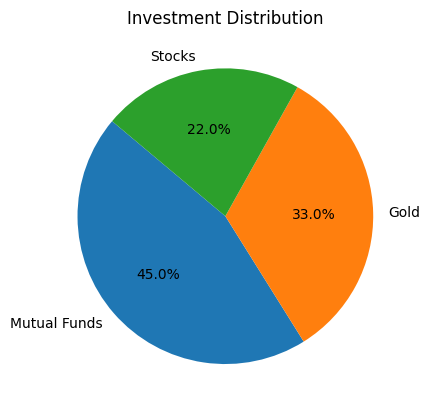

In [10]:
# Updated Breakdown: Now accounts for Mutual Fund Names and fixes the pie chart issue

import pandas as pd
import numpy as np
import yfinance as yf
import numpy_financial as npf
import matplotlib.pyplot as plt

# Load Mutual Fund Data, you will get from Keggle se
mutual_fund_data = pd.read_csv('/content/sample_data/comprehensive_mutual_funds_data.csv')

# Step 1: Get user input, as deviced earlier 15 inputs but abhi shuruat j to will take some limited inouts
def get_user_input():
    financial_goal = float(input("Enter your financial goal amount: "))
    goal_timeline_months = int(input("Enter goal timeline in months: "))
    risk_min = int(input("Enter your minimum risk tolerance (0-6): "))
    risk_max = int(input("Enter your maximum risk tolerance (0-6): "))
    monthly_income = float(input("Enter your current monthly income: "))
    monthly_expenses = float(input("Enter your monthly expenses: "))
    previous_savings = float(input("Enter your previous savings: "))

    return {
        "financial_goal": financial_goal,
        "goal_timeline_months": goal_timeline_months,
        "risk_min": risk_min,
        "risk_max": risk_max,
        "monthly_income": monthly_income,
        "monthly_expenses": monthly_expenses,
        "previous_savings": previous_savings
    }

# Step 2: Filter mutual funds based on risk tolerance, data basd on the dataset
def filter_mutual_funds(risk_min, risk_max):
    return mutual_fund_data[(mutual_fund_data['risk_level'] >= risk_min) &
                            (mutual_fund_data['risk_level'] <= risk_max)]

# Step 3: Select top 3 mutual funds
def select_top_mutual_funds(filtered_funds):
    # Sort funds by best 1-year returns and pick the top 3
    return filtered_funds.sort_values(by='returns_1yr', ascending=False).head(3)

# Step 4: Fetch live data for gold and stocks
def fetch_live_data():
    gold_data = yf.download("GC=F", start="2022-01-01", end="2023-01-01")
    stock_data = yf.download("^NSEI", period="6mo", interval="1d")  # NSE Nifty 50 index
    return gold_data, stock_data

# Step 5: Calculate expected returns
def calculate_expected_returns(top_funds, gold_data, stock_data):
    stock_returns = (stock_data['Close'].iloc[-1] - stock_data['Close'].iloc[0]) / stock_data['Close'].iloc[0] * 100
    gold_returns = (gold_data['Close'].iloc[-1] - gold_data['Close'].iloc[0]) / gold_data['Close'].iloc[0] * 100
    mutual_fund_returns = top_funds['returns_1yr'].mean()

    return mutual_fund_returns, stock_returns, gold_returns

# Step 6: Dynamic SIP Allocation for Mutual Funds and lump sum for stocks/gold
def sip_allocation(monthly_savings):
    mutual_fund_sip = np.random.uniform(0.40, 0.50) * monthly_savings
    remaining_savings = monthly_savings - mutual_fund_sip
    gold_investment = remaining_savings * 0.60
    stock_investment = remaining_savings * 0.40
    return mutual_fund_sip, gold_investment, stock_investment

# Step 7: Calculate future value of lump sum investments and monthly SIPs
def calculate_future_value(month, mutual_fund_sip, gold_investment, stock_investment, mutual_fund_returns, gold_returns, stock_returns):
    mutual_fund_future_value = npf.fv(mutual_fund_returns / 100 / 12, month, -mutual_fund_sip, 0)
    gold_future_value = npf.fv(gold_returns / 100 / 12, month, 0, -gold_investment)
    stock_future_value = npf.fv(stock_returns / 100 / 12, month, 0, -stock_investment)

    total_future_value = mutual_fund_future_value + gold_future_value + stock_future_value
    return total_future_value

# Step 8: Dynamic investment plan for monthly investments
def dynamic_investment_plan(user_input, top_funds, mutual_fund_returns, gold_returns, stock_returns):
    monthly_savings = user_input['monthly_income'] - user_input['monthly_expenses']
    months = user_input['goal_timeline_months']
    total_future_value = 0

    # Cumulative values to track total SIPs for the pie chart
    total_mutual_fund_sip = 0
    total_gold_investment = 0
    total_stock_investment = 0

    # Calculate future value with monthly contributions
    for month in range(1, months + 1):
        mutual_fund_sip, gold_investment, stock_investment = sip_allocation(monthly_savings)
        total_future_value += calculate_future_value(month, mutual_fund_sip, gold_investment, stock_investment,
                                                     mutual_fund_returns, gold_returns, stock_returns)
        # Accumulate SIPs and investments for pie chart
        total_mutual_fund_sip += mutual_fund_sip
        total_gold_investment += gold_investment
        total_stock_investment += stock_investment

    # Show breakdown
    print(f"\n--- Monthly Investment Breakdown ---")
    print(f"Monthly Savings: ₹{monthly_savings:.2f}")
    print(f"Mutual Funds SIP: ₹{mutual_fund_sip:.2f}")
    print(f"Gold Investment: ₹{gold_investment:.2f}")
    print(f"Stock Investment: ₹{stock_investment:.2f}")
    print(f"Total Future Value: ₹{total_future_value:.2f}")

    return total_future_value, total_mutual_fund_sip, total_gold_investment, total_stock_investment

# Step 9: Generate a financial plan
def generate_financial_plan(user_input):
    # Filter mutual funds by risk and select top 3
    filtered_funds = filter_mutual_funds(user_input['risk_min'], user_input['risk_max'])
    top_funds = select_top_mutual_funds(filtered_funds)

    # Fetch gold and stock data
    gold_data, stock_data = fetch_live_data()

    # Calculate expected returns
    mutual_fund_returns, stock_returns, gold_returns = calculate_expected_returns(top_funds, gold_data, stock_data)

    # Get the future value based on dynamic allocation
    total_future_value, total_mutual_fund_sip, total_gold_investment, total_stock_investment = dynamic_investment_plan(
        user_input, top_funds, mutual_fund_returns, gold_returns, stock_returns)

    # Display financial plan results
    print(f"\nInitial capital: {user_input['previous_savings']:.2f}")
    print(f"Capital after {user_input['goal_timeline_months']} months of investments: ₹{total_future_value:.2f}")
    print(f"How close to target: {total_future_value / user_input['financial_goal'] * 100:.2f}%")

    # Display suggested mutual funds with SIPs
    print("\nSuggested Mutual Funds and SIP Amounts:")
    for idx, row in top_funds.iterrows():
        fund_allocation_percentage = row['returns_1yr'] / top_funds['returns_1yr'].sum()  # Distribute based on returns
        sip_amount = fund_allocation_percentage * total_mutual_fund_sip / user_input['goal_timeline_months']
        print(f"Scheme: {row['scheme_name']}, 1-Year Return: {row['returns_1yr']}%, SIP Amount: ₹{sip_amount:.2f}")

    # Visualization: Pie chart for investment distribution
    labels = ['Mutual Funds', 'Gold', 'Stocks']
    sizes = [total_mutual_fund_sip, total_gold_investment, total_stock_investment]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Investment Distribution')
    plt.show()

# Main function
def main():
    user_input = get_user_input()
    generate_financial_plan(user_input)

if __name__ == "__main__":
    main()
